In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 
import re
import datetime as dt
import seaborn as sns
import pickle

In [ ]:
df=pd.read_csv('Downloads\Lab_monitor_IOT.csv')

In [ ]:
df.head()

In [ ]:
df1=df.copy()

In [ ]:
df1['id']=df1['id'].str.extract(r'([0-9]+)')

In [ ]:
df1.head()

extract day ,month,day_name, hour,season, timing

In [ ]:
df1.info()

In [ ]:
df1['noted_date']=pd.to_datetime(df1['noted_date'])

In [ ]:
df1.info()

Now we have converted it into date time now we can extract day ,hours,time from the columns

In [ ]:
df1['Day']=df1['noted_date'].dt.day
df1['Month']=df1['noted_date'].dt.month
df1['Day_name']=df1['noted_date'].dt.day_name()
df1['hours']=df1['noted_date'].dt.hour


In [ ]:
df1.head()

In [ ]:
def season(x):
    if x in [11,12,1,2]:
        return 'winter'
    elif x in [3,4]:
        return 'spring'
    elif x in [5,6,7]:
        return 'summer'
    else:
        return 'rainy'

In [ ]:
df1['season']=df1['Month'].apply(season)

In [ ]:
df1.head()

In [ ]:
def timing(x):
    if x in range(3,5):
        return 'Early Morning'
    elif x in range(6,11):
        return 'Morning'
    elif x==12:
        return 'Noon'
    elif x in range(13,15):
        return 'after Noon'
    elif x in range(16,18):
        return 'Evening'
    else:
        return 'Night'

In [ ]:
df1['Timing']=df1['hours'].apply(timing)

In [ ]:
df1.head()

# EDA

In [115]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          97606 non-null  object        
 1   room_id/id  97606 non-null  object        
 2   noted_date  97606 non-null  datetime64[ns]
 3   temp        97606 non-null  int64         
 4   out/in      97606 non-null  object        
 5   Day         97606 non-null  int64         
 6   Month       97606 non-null  int64         
 7   Day_name    97606 non-null  object        
 8   hours       97606 non-null  int64         
 9   season      97606 non-null  object        
 10  Timing      97606 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 8.2+ MB


<AxesSubplot:xlabel='out/in'>

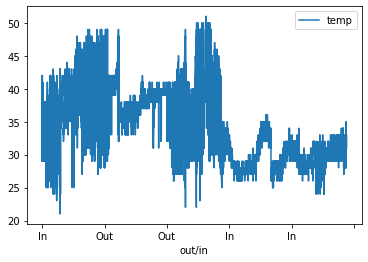

In [116]:
df.plot('out/in')

<AxesSubplot:xlabel='Month', ylabel='temp'>

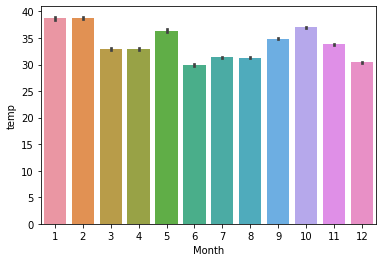

In [117]:
sns.barplot(x='Month',y='temp',data=df1)

As we can see there are temp is 41  in rainy season ,in sunday temp is 29 

<AxesSubplot:xlabel='season', ylabel='count'>

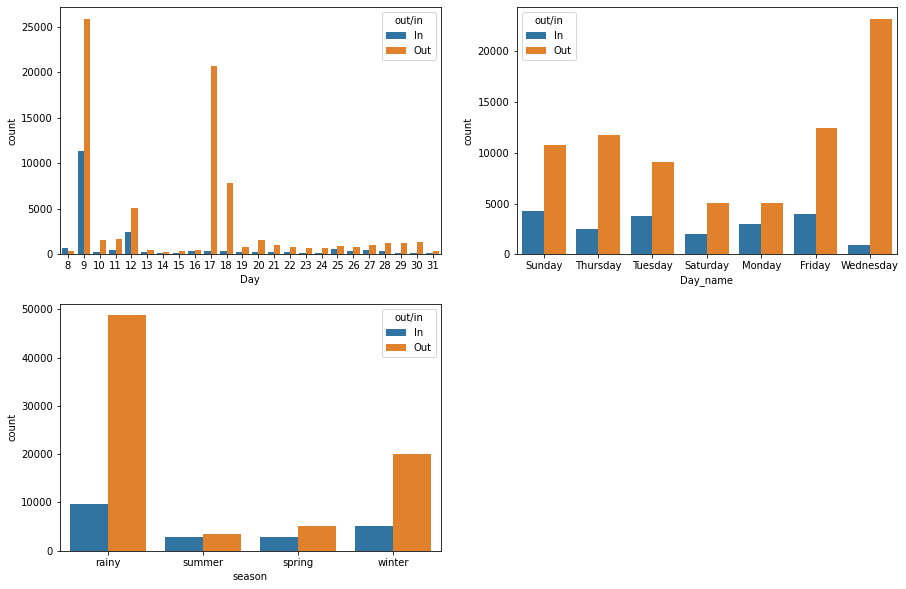

In [118]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(x='Day',hue='out/in',data=df1)
plt.subplot(2,2,2)
sns.countplot(x='Day_name',hue='out/in',data=df1)
plt.subplot(2,2,3)
sns.countplot(x='season',hue='out/in',data=df1)

As we can see their are on 9th ,wednesday and rainy season out is maximum

([<matplotlib.patches.Wedge at 0x21f01c64790>,
 [Text(0.03274487471090358, 1.0995125161543944, 'Night'),
  Text(-0.9411458574701079, -0.5694246877040505, 'Morning'),
  Text(-0.045234953117112585, -1.0990695150974268, 'after Noon'),
  Text(0.6394627820099505, -0.895034831961357, 'Evening'),
  Text(0.9828234362357443, -0.4940223610179643, 'Early Morning'),
  Text(1.090667372039901, -0.14298490678241776, 'Noon')],
 [Text(0.01786084075140195, 0.5997340997205787, '49.05%'),
  Text(-0.513352285892786, -0.31059528420220933, '19.22%'),
  Text(-0.02467361079115232, -0.5994924627804145, '12.16%'),
  Text(0.34879788109633664, -0.48820081743346744, '8.90%'),
  Text(0.5360855106740423, -0.26946674237343504, '6.53%'),
  Text(0.5949094756581277, -0.07799176733586423, '4.15%')])

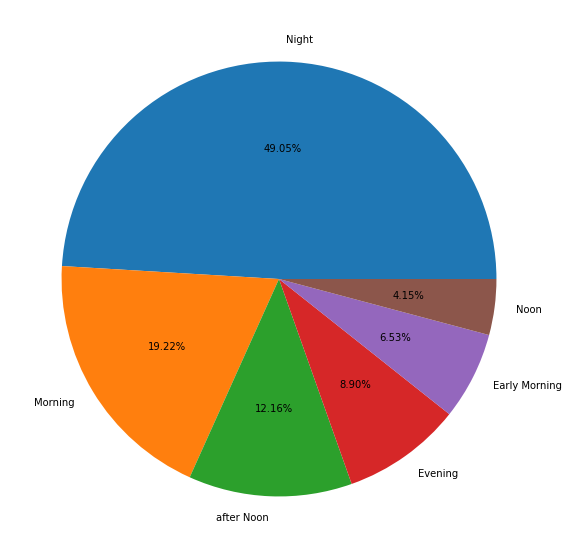

In [119]:
plt.figure(figsize=(10,10))
# plt.subplot(2,2,1)
plt.pie(x=df1['Timing'].value_counts(),labels=df1['Timing'].value_counts().index,autopct='%.2f%%',data=df1)
# plt.subplot(2,2,2)
# sns.countplot(x='Day_name',hue='out/in',data=df1)
# plt.subplot(2,2,3)
# sns.countplot(x='season',hue='out/in',data=df1)

 from the graph we can see the maximum percentage in night 

<AxesSubplot:ylabel='Count'>

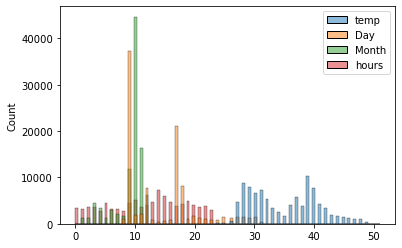

In [120]:
sns.histplot(df1)

As we can see the data is not normalily distributed 

In [121]:
df10=df1.drop(['id','noted_date'],axis=1)


<AxesSubplot:>

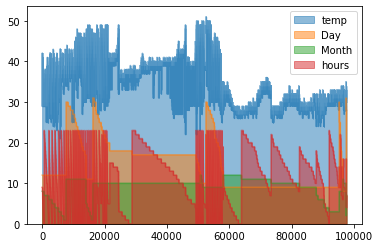

In [122]:
df10.plot.area(stacked=False)

In [123]:
df1.head()

,id,room_id/id,noted_date,temp,out/in,Day,Month,Day_name,hours,season,Timing
0,196134,Room Admin,2018-08-12 09:30:00,29,In,12,8,Sunday,9,rainy,Morning
1,196131,Room Admin,2018-08-12 09:30:00,29,In,12,8,Sunday,9,rainy,Morning
2,196127,Room Admin,2018-08-12 09:29:00,41,Out,12,8,Sunday,9,rainy,Morning
3,196128,Room Admin,2018-08-12 09:29:00,41,Out,12,8,Sunday,9,rainy,Morning
4,196126,Room Admin,2018-08-12 09:29:00,31,In,12,8,Sunday,9,rainy,Morning


<AxesSubplot:xlabel='temp', ylabel='Count'>

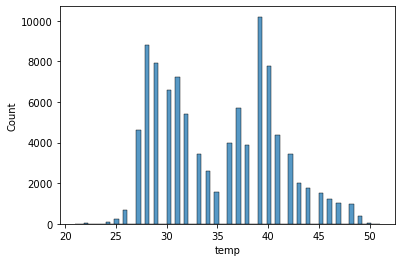

In [124]:
sns.histplot(data=df1,x='temp')

As we can see the maximum time temp goes 45 degree 

<AxesSubplot:xlabel='Timing', ylabel='temp'>

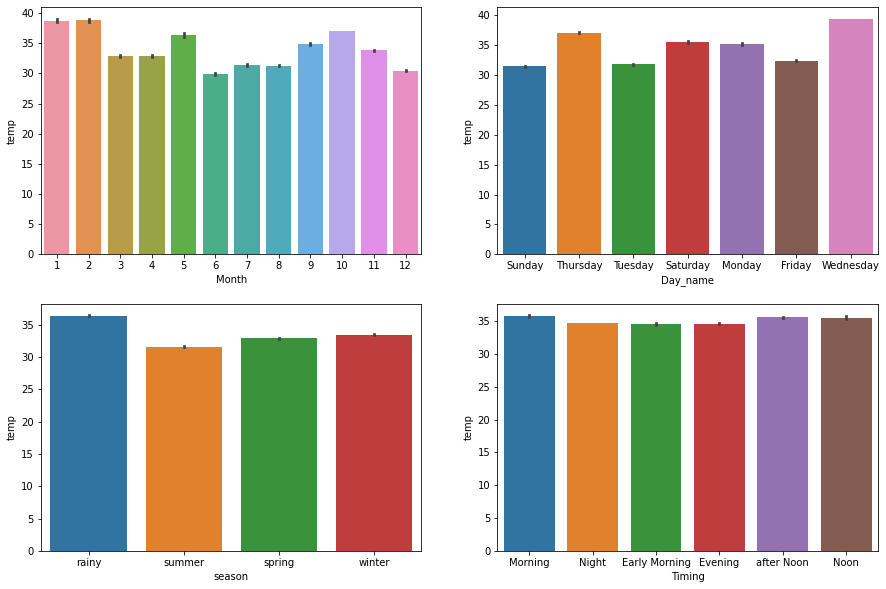

In [125]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,4)
plt.subplot(2,2,1)
sns.barplot(x='Month',y='temp',data=df1)
plt.subplot(2,2,2)
sns.barplot(x='Day_name',y='temp',data=df1)
plt.subplot(2,2,3)
sns.barplot(x='season',y='temp',data=df1)
plt.subplot(2,2,4)
sns.barplot(x='Timing',y='temp',data=df1)


<AxesSubplot:xlabel='Timing', ylabel='temp'>

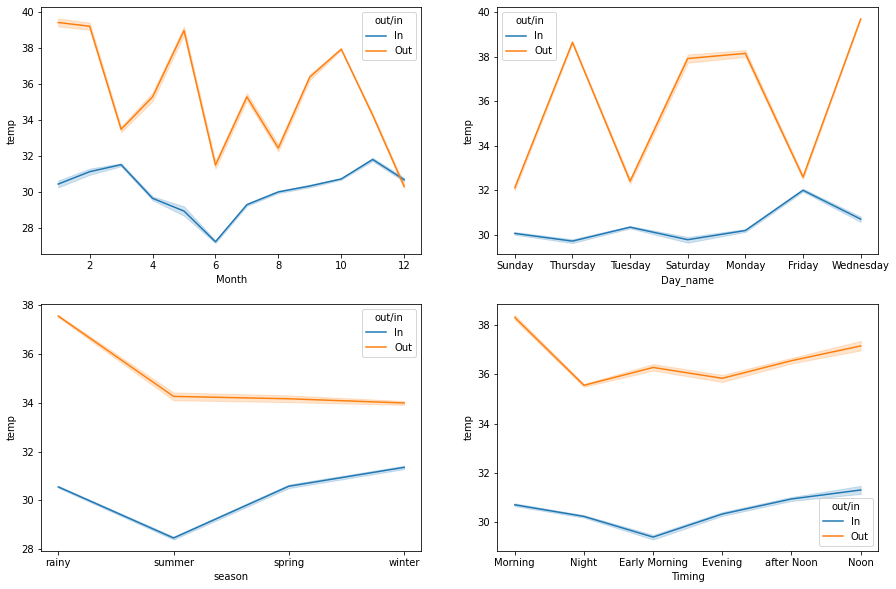

In [126]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,4)
plt.subplot(2,2,1)
sns.lineplot(x='Month',y='temp',hue='out/in',data=df1)
plt.subplot(2,2,2)
sns.lineplot(x='Day_name',y='temp',hue='out/in',data=df1)
plt.subplot(2,2,3)
sns.lineplot(x='season',y='temp',hue='out/in',data=df1)
plt.subplot(2,2,4)
sns.lineplot(x='Timing',y='temp',hue='out/in',data=df1)

Same like in Line Graph  we can see the temp of ‘in’ is max in November and ‘Out’ is  in Jan month and both have min temp in Month of June.
In weeks the ‘Out’ temp is max on Thursday and ‘in’ temp is Max on Friday and on Friday. ‘Out’ is min on Tuesday and ‘in’ is min on Thursday 
In season rainy 'out' temp is high and in winter 'in' temp is high and in winter ‘out’ is low and in summer 'in' temp is low
In timing the 'in' temp is high in noon and out 'temp' is high in morning  and 'out' is low in night and 'in' temp is low in early morning 


from the line graph we can understand in jan,on wednesday, in rainy season and in morning time the temp is Max

<AxesSubplot:xlabel='Timing', ylabel='temp'>

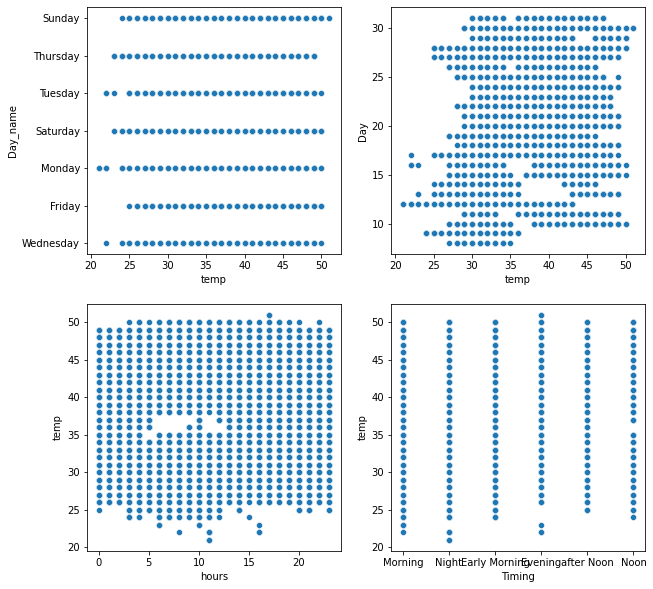

In [127]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,4)
plt.subplot(2,2,1)
sns.scatterplot(x='temp',y='Day_name',data=df1)
plt.subplot(2,2,2)
sns.scatterplot(x='temp',y='Day',data=df1)
plt.subplot(2,2,3)
sns.scatterplot(x='hours',y='temp',data=df1)
plt.subplot(2,2,4)
sns.scatterplot(x='Timing',y='temp',data=df1)

From the scatter plot we are not getting much information

In [128]:
df1.head()

,id,room_id/id,noted_date,temp,out/in,Day,Month,Day_name,hours,season,Timing
0,196134,Room Admin,2018-08-12 09:30:00,29,In,12,8,Sunday,9,rainy,Morning
1,196131,Room Admin,2018-08-12 09:30:00,29,In,12,8,Sunday,9,rainy,Morning
2,196127,Room Admin,2018-08-12 09:29:00,41,Out,12,8,Sunday,9,rainy,Morning
3,196128,Room Admin,2018-08-12 09:29:00,41,Out,12,8,Sunday,9,rainy,Morning
4,196126,Room Admin,2018-08-12 09:29:00,31,In,12,8,Sunday,9,rainy,Morning


As we can see the graph on first  month of the year jan, wednesday and in rainy season temp is maximum, timing are almost same

# Preprocessing

In [ ]:
df1.head()

we will remove room_id because same value is repeating and machine will not learn new from this

In [ ]:
df1=df1.drop('room_id/id',axis=1)

In [ ]:
df1.head()

In [ ]:
df1.isnull().sum()

As we can see their are no null values

In [ ]:
df1.describe()

In [ ]:
sns.boxplot(data=df1)

In [ ]:
sns.boxplot(x='Day',data=df1)

In [ ]:
sns.boxplot(x='Month',data=df1)

As we can see there are outlier on day columns
let remove the outliers 

In [ ]:
Q1=df1.quantile(.25)
Q3=df1.quantile(.75)
IQR=Q3-Q1
Upper_fance=Q3+1.5*IQR
lower_fance=Q1-1.5*IQR

In [ ]:
print('Upper_fance',Upper_fance)
print('lower_fance',lower_fance)

In [ ]:
df1.describe()

In [ ]:
df1['Day']=np.where(df1['Day']>29,29,np.where(df1['Day']<-3,-3,df1['Day']))
df1['Month']=np.where(df1['Month']>11.5,11.5,np.where(df1['Month']<-3,-3,df1['Month']))
df1['hours']=np.where(df1['hours']>32,32,np.where(df1['hours']<-3,-3,df1['hours']))

In [ ]:
df1.describe()

we have treat outlier by capping technique

now we will check the correlation 

In [ ]:
Corr_matrix=df1.corr()

In [ ]:
Corr_matrix

In [ ]:
sns.heatmap(Corr_matrix,annot=True)

As we can see there are not multi correlation

Now we will proceed for label Encoding

In [ ]:
df1.head()

 label encoding

In [ ]:
df1['season'].value_counts()

In [ ]:
df1['Timing'].value_counts()

In [ ]:
from sklearn.preprocessing import LabelEncoder 

In [ ]:
le=LabelEncoder()

In [ ]:
df1[['out/in','Day_name','season','Timing']]=df1[['out/in','Day_name','season','Timing']].apply(le.fit_transform)

In [ ]:
df1.head()# now we have assign 0 as in and 1 as out 

Now we will drop columns 'noted_date' beacuse we have extracted information and will take in temp as taget 

In [ ]:
df.info()

In [ ]:
df1=df1.drop(['noted_date'],axis=1)

In [ ]:
df1.head()

In [ ]:
df2=df1[df1['out/in'].values==0]# we have take the value of in 

In [ ]:
df2.head()

In [ ]:
df3=df1[df1['out/in'].values==1]

first we will perform modeling in temp  data then out temp data as a taget

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df2.drop('temp',axis=1)
Y=df2['temp']

In [ ]:
X.head()

In [ ]:
Y.head()

# Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()

In [ ]:
X1=scaler.fit_transform(X)

In [ ]:
X=pd.DataFrame(X1,columns=X.columns)

In [ ]:
X.head()

In [ ]:
import statsmodels.api as sm # required for adding constant


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2,random_state=100)

In [ ]:
from sklearn.linear_model import LinearRegression
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score
from sklearn import linear_model

In [ ]:
lr=LinearRegression()
import statsmodels.api as sm # required for adding constant
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
svr=SVR()
clf = linear_model.Lasso(alpha=0.1)


In [ ]:
for model in [lr,dt,rf,svr,clf]:
    print('======='*3)
    print('Perfomance of model',model)
    print('------')
    ab=model.fit(X_train,Y_train)
    y_pred=ab.predict(X_test)
#     score=model.score(Y_test,y_pred)
    mse=MSE(Y_test,y_pred)
    mae=MAE(Y_test,y_pred)
    r=r2_score(Y_test,y_pred)
#     print('score',score)  
    print("mse",mse) 
    print("======="*3)
    print("mae",mae) 
    print("======="*3)
    print("accuracy",r) 
     
      

we are not getting accuracy in linear regression but in random forest,Lasso and decision tree we are getting  97,91,88

lets apply modeling in 'out' data as a taget variable

In [ ]:
X1=df3.drop('temp',axis=1)
Y1=df3['temp']

In [ ]:
X2=scaler.fit_transform(X1)

In [ ]:
X1=pd.DataFrame(X2,columns=X1.columns)

In [ ]:
X1.head()

In [ ]:
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y1,test_size=.2,random_state=100)

In [264]:
X1_test.head()

,id,out/in,Day,Month,Day_name,hours,season,Timing
64059,0.581507,0.0,0.047619,0.857143,0.833333,0.739130,0.0,0.2
50852,0.588887,0.0,0.047619,1.000000,0.500000,0.304348,1.0,0.4
46447,0.183364,0.0,1.000000,0.761905,0.500000,0.565217,0.0,1.0
27269,0.305489,0.0,0.428571,0.857143,1.000000,0.869565,0.0,0.6
54886,0.065725,0.0,0.047619,0.952381,0.000000,0.956522,1.0,0.6


In [267]:
for model in [lr,dt,rf,svr,clf]:
    print('======='*3)
    print('Perfomance of model',model)
    print('------')
    ab=model.fit(X1_train,Y1_train)
    y1_pred=ab.predict(X1_test)
#     score=model.score(Y_test,y_pred)
    mse=MSE(Y1_test,y1_pred)
    mae=MAE(Y1_test,y1_pred)
    r=r2_score(Y1_test,y1_pred)
#     print('score',score)  
    print("mse",mse) 
    print("======="*3)
    print("mae",mae) 
    print("======="*3)
    print("accuracy",r) 

Perfomance of model LinearRegression()
------
mse 14.53369567586039
mae 2.8996652821308593
accuracy 0.5571001822754966
Perfomance of model DecisionTreeRegressor()
------
mse 0.583058305830583
mae 0.46696434349317284
accuracy 0.9822318821630456
Perfomance of model RandomForestRegressor()
------
mse 0.42450275027502754
mae 0.4498608684397852
accuracy 0.9870637038979262
Perfomance of model SVR()
------
mse 3.78977466131317
mae 1.0704234837645428
accuracy 0.8845104133079917
Perfomance of model Lasso(alpha=0.1)
------
mse 15.690099839747013
mae 3.1099501173756345
accuracy 0.5218599237188289


we are not getting accuracy in linear regression but in random forest and decision tree we are getting 98% 

# Conclusion

-

As we can see, Random forest , Lasso and decision tree are performing really well on the datasets. But we got best results in  Lasso  algorithm

lasso achieved 97% accuracy in ‘IN’ as a Target variable 

In ‘OUT’ target variable we are getting accuracy in  random forest and decision tree we are getting 98%

We have conclude that the temp is high in Month of January , February  and Minimum temp in month of June 

On Wednesday and in morning time temp is high

In rainy season the temperature is high and on the contrary in Summer it’s Low



In [273]:
pickle.dump(rf,open('model.pkl','wb'))
model=pickle.load(open("model.pkl",'rb'))   

In [274]:
print(model.predict([[0.183364,0.0,1.000000,0.761905,0.500000,0.565217,0.0,1.0]]))

[49.42]
